# Background Information


Personal cellphone has been around since the 1970's, however the first ever smartphone was invented in 1992 by IBM it call [simon personal communicator](https://en.wikipedia.org/wiki/IBM_Simon#Features). 


Then come along the 3G network where it allow a smartphone to be connected to the internet. 


After that in 2007 we have the first iphone where it almost revolutionize the smartphone idustry, as it was the sleekest designed phone and the first smart phone that offered a full unwatered down version of the internet


Fast forward to 2020, since the launch of iphone, major thing that happened to smart phone industry are **The Launch of Android**, the rise of application industry (and the monetazion of them), and more others.

As of today it's [predicted that 2.5 billion people around the worlds own smartphone](https://www.pewresearch.org/global/2019/02/05/smartphone-ownership-is-growing-rapidly-around-the-world-but-not-always-equally/), with the growing numbers of smartphone ownership, the number of smartphone manufacturing is also growing. Smartphone companies launch a product that varies in computational power.


This notebook, is an Exploratory data analysis on smartphone price range and how hardware inside of a smartphone will affect the price of a smartphone.

In this notebook we are going to predict on a smartphone price range based on the hardware feature using a machine learning classification method





# Problem Statement


As the competition of smartphones get more and more competitive each day, finding the best pricing range for a smartphone would be a key strategy to have a profitable smartphone company.

However as there are more and more smartphone it's getting harder and harder for a company to justified a price range of a phone. 

if a company set a smartphone that's too expensive with low computational power nobody is going to buy it, and if a company set a smartphone price range too low based on it's computational power the smartphone company is going to lose on potential profit. 

## EDA Goals 


### Findout what specification that affecting phone price range 


- **What are the the specification of a phone that's affecting the price range**
    - Does Screensize matter to the price range
    - Do the camera megapixel affecting the price of a phone
    - How does RAM size affecting the price range

## Machine Learning Goals 

**Predicting Phone Price Range Based on Their Specification**
- **What Machine Learning classification models that has the best evaluation matrix to predict phone price based on their specification**

This prediction could be useful for a mobile phone company to price their phone price range based a specification 


In [205]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')
import sidetable as stb

In [103]:
pd.set_option('display.max_columns', None)

## Getting the basic understanding of the data 

### Description of each columns 

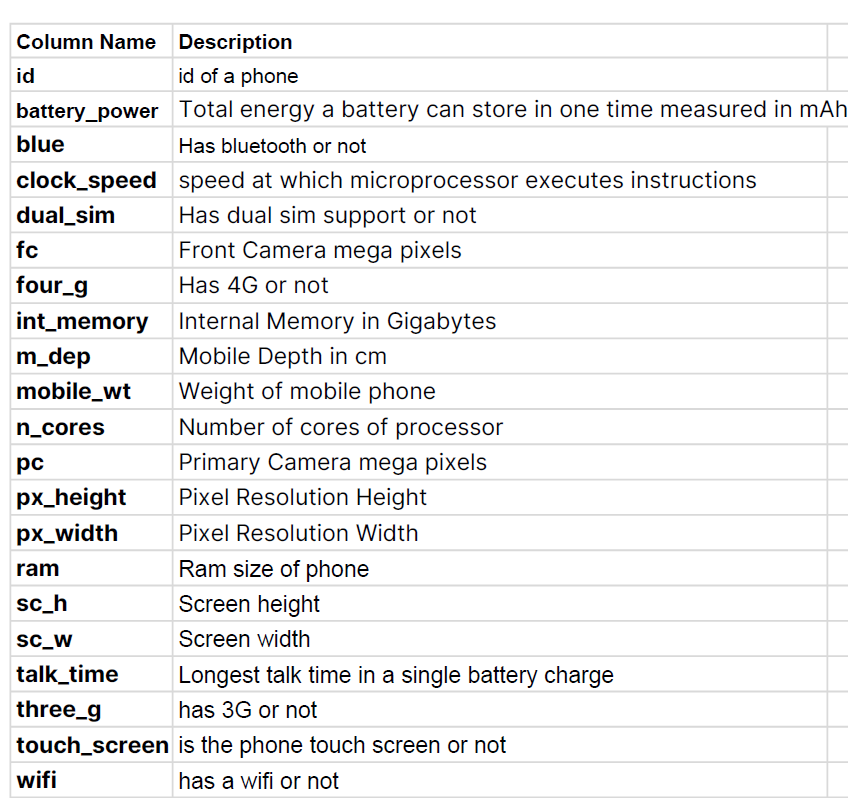

In [658]:
df = pd.read_csv('phone.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [659]:
df.info()

## all of the column types are in int or float generally speaking if we want to use all the columns for machine learning process 
## it's  ready without any encoding 
# this data probaby has no null values because we can see from the range index is 2000 value and all each columns have 2000 value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [660]:
df.describe()

# this dataset i assume is not from the 2020 phone because by just looking at the battery power there's no phone above 2000 MAH
# there's probaby an outlier in fc column (front camera mega pixel by looking the min and max value ) need more investigation 
# there's a phone without front camera in this dataset, might be a good insight to bin in 
# we could get a screen size by getting diagonal of phone screen height and width 
# the maximum ram in this phone is almost 4000 mb (4GB), this could be a good insight if we bin it properly
# the maximum core for this phone dataset is 8 cores (octacores) and the minimum is a single core phone (1 core)
# the heaviset phone is 200 gram which is normal for phone these days 
# we can group the phone by screen quality by using px_height, px_weight
# there's a row with 0 pixel height which is unusual not to have pixel height in a phone
# there's also an usual row value of 0 in screen width, it doesn't make sense that a phone has 0 width

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Checking the null value and the outliers of the columns 


In [661]:
## sanity check to make sure there's no null value in the columns 
df.isna().sum()

# great now we know there's no null value in the columns we don't have to worry about dropping or filling some null val

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

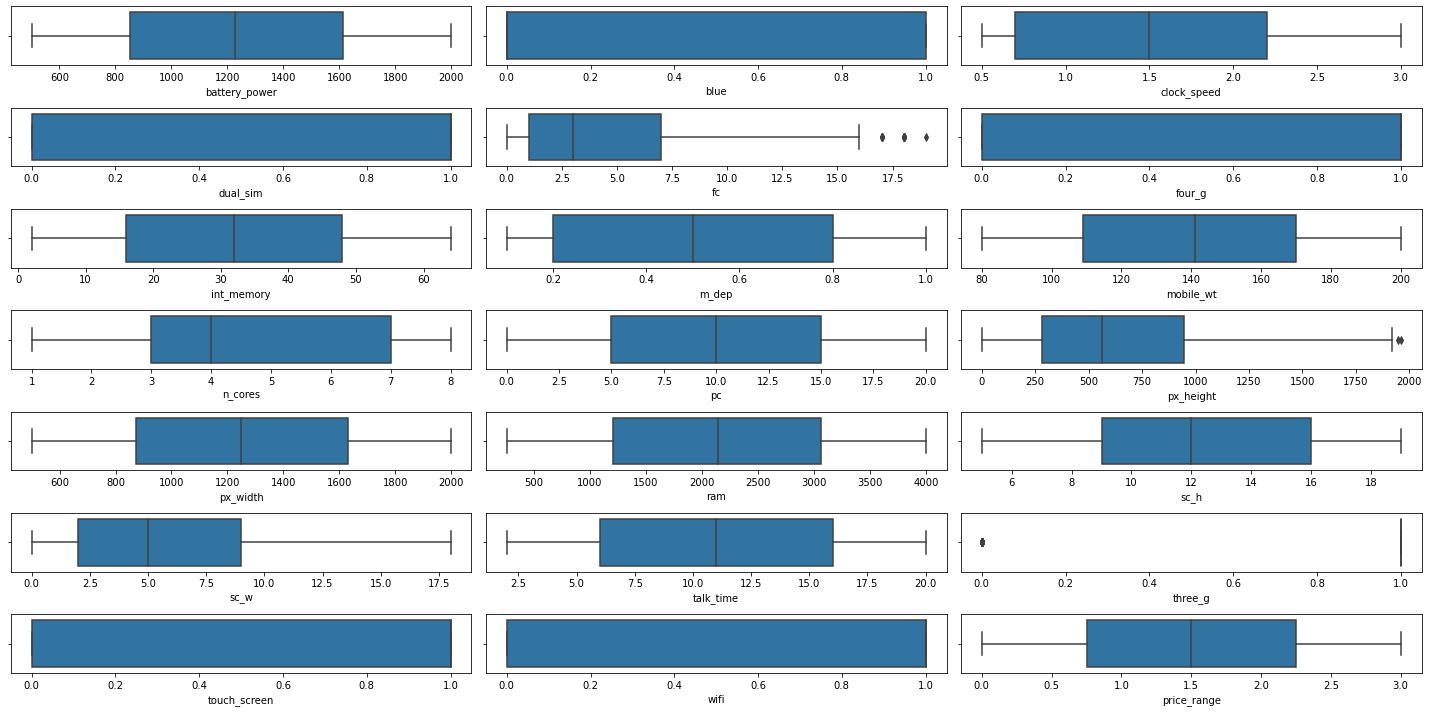

In [662]:
## outlier checking with a box plot 

plt.figure(figsize = (20, 10))
x = 1 

for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x+= 1

plt.tight_layout()

# as i mentioned before above there's probably an outliers in fc column and we found some outliers there
# there are also and outliers in the px height columns 
# we won't worry about the outliers because it seems it only small proportion of the value we will figure out how many outliers
# are in those columns 

In [663]:
## getting the number of the outliers in fc column

df_description = df.describe()
fc_Q1 =  df_description['fc']['25%']
fc_Q3 = df_description['fc']['75%']
fc_IQR = fc_Q3 - fc_Q1

up_fence = fc_Q3 + (1.5 * fc_IQR)
lo_Fence = fc_Q1 - (1.5 * fc_IQR)

fc_outliers =  df[(df['fc'] < lo_Fence) | (df['fc']> up_fence)]
fc_outliers

# there are 18 phone that has a front camera outlier value 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [664]:
px_height_Q1 =  df_description['px_height']['25%']
px_height_Q3 = df_description['px_height']['75%']
px_height_IQR = px_height_Q3 - px_height_Q1

up_fence_px_height = px_height_Q3 + (1.5 * px_height_IQR)
lo_Fence_px_height = px_height_Q1 - (1.5 * px_height_IQR)

px_height_outliers =  df[(df['px_height'] < lo_Fence_px_height) | (df['px_height']> up_fence_px_height)]
px_height_outliers

# there's only 2 phone that has an outlier value in the px_height column

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [665]:
# total_number of outliers 

total_outliers = len(fc_outliers) + len(px_height_outliers)
print(f"total outliers of fc : {len(fc_outliers)}")
print(f"total outliers of px_height: {len(px_height_outliers)}" )
print(f"total percentage of outliers: {round((total_outliers / len(df))*100,2)}%")

# the outliers of the dataset is around 1 % of the entire dataset so we won't worry much about it because it polly wouldn't affect
# the analysis process 
# and we will try to bin the outliers value to have  a better analysis process 

total outliers of fc : 18
total outliers of px_height: 2
total percentage of outliers: 1.0%


In [666]:
## Handling Random Values

df[df['px_height'] == 0]

# we will group by the price range and replace the 0 value of px_height to the averaege of px_height based on price_range

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [667]:
df.groupby('price_range')['px_height'].mean()

price_range
0    536.408
1    666.892
2    632.284
3    744.848
Name: px_height, dtype: float64

In [668]:
df['px_height'] = df['px_height'].replace(0, np.nan)

# the index of the row with null value is 
# 1481
# 1933

In [669]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

In [670]:
df[df['px_height'] == 0]

# now there is no 0 value in the in the pixel height 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [671]:
df[df['sc_w'] == 0]

# this is almost 10 % of the data has a random values we will fill with the average of phone screen width to replace the 0 value
# we will group by the the price range and fill it based on the mean screensize per price range 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607.0,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201.0,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178.0,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685.0,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042.0,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317.0,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892.0,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227.0,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64.0,745,1503,10,0,13,0,0,0,0


In [672]:
df.groupby('price_range')['sc_w'].mean()

# this is the the mean for each price range and we will fill the 0 value of sc_w based on their price range 
# the index to check after filling are 33,42,50,1954 all this index representing all price range 

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

In [673]:
# first we turn all the 0 value into nan value this is just because preference

df['sc_w'] = df['sc_w'].replace(0, np.nan)


In [674]:
df['sc_w'] = df['sc_w'].fillna(df.groupby('price_range')['sc_w'].transform('mean'))

In [675]:
df[df['sc_w'] == 0]

# now the screen width has no 0 values as well 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [676]:
df[df['px_height'] < 200]

# having pixel height that's lower than 200 is still weird because of that's a super low resolution 
# comparing the minimum px width and the minimum px height is already kind of unsusal the min px_width is around 600 while
# for the px height is 1 right now after we clean all the 0 value 


#FYI :

# the oldest phone that only have around 200 - 300 px height is NOKIA 230 which has the resolution of 240 x 320 pixels
# and that nokia only have 16 MB RAM while in this dataset phone with 2GB or more RAM having that small resolusion is kind of
# random / suspicious to me 

# according to stackoverflow article below that lowest screen for a phone is 240 X 320 
#https://stackoverflow.com/questions/34035799/what-is-the-lowest-screen-resolution-for-a-smartphone

# however since this dataset doesnot mention what kind are phone in this dataset we're going to let is pass
# if this randomness of data bother us we will do a separate analysis on this 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20.0,756,2549,9,7.000000,19,0,0,1,1
11,1520,1,2.2,0,5,1,33,0.5,177,8,18,151.0,1005,3826,14,9.000000,13,1,1,1,3
28,1453,0,1.6,1,12,1,52,0.3,96,2,18,187.0,1311,2373,10,1.000000,10,1,1,1,2
32,1319,1,0.9,0,3,1,41,0.9,107,1,18,85.0,1152,2227,18,5.000000,3,1,1,1,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178.0,1919,3845,7,6.646421,12,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1906,1,1.9,1,3,0,55,0.2,113,3,4,3.0,629,1871,13,5.000000,4,1,0,1,1
1965,659,0,1.4,1,2,1,3,0.1,85,8,6,190.0,657,967,10,1.000000,14,1,0,1,0
1972,1191,0,0.8,0,6,1,46,0.8,89,6,9,42.0,807,824,19,18.000000,7,1,0,0,0
1979,1614,0,1.2,0,1,1,9,0.1,161,3,2,173.0,1219,1832,15,8.000000,11,1,0,0,1


### Screen Guide

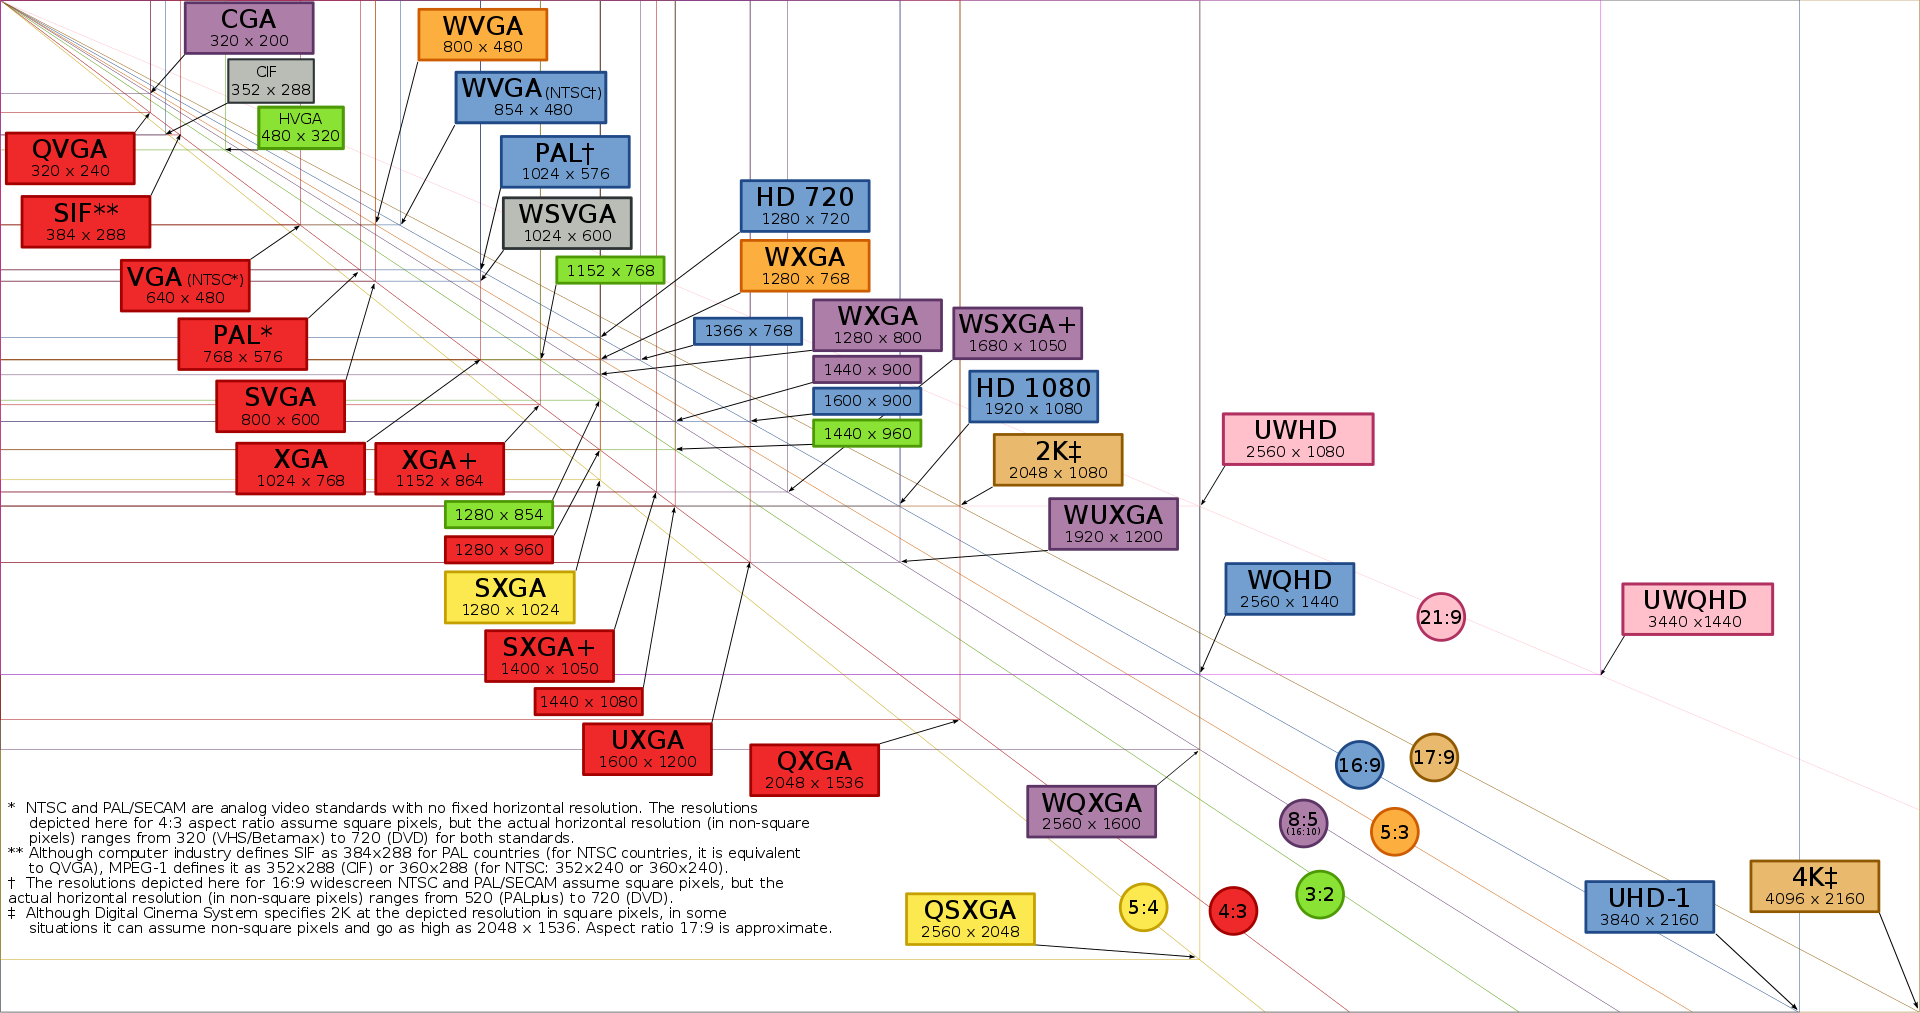

In [677]:
df.loc[df['px_height']<240, 'px_height'] = np.nan

In [678]:
df['px_height'] = df['px_height'].fillna(df.groupby('price_range')['px_height'].transform('mean'))

In [679]:
# just for sanity check to check the null value in all the row since i turned 0 values into np.nan

df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [680]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [681]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.000000,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.000000,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.000000,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.000000,1212,1411,8,2.0,15,1,1,0,1


### Preparation Process (Feature Engineering for EDA) 

In [643]:
# front camera, since there're phone with front camera and phone without front camera i will create a new column whether 
# a phone has a front came or not 

df.loc[df['fc'] == 0, 'is_fc'] = 0
df.loc[df['fc'] > 0, 'is_fc'] = 1

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,17,1.0,10,1,0,0,1,1.0


In [644]:
## same goes to the primary camera 

df.loc[df['pc'] == 0, 'is_pc'] = 0
df.loc[df['pc'] > 0, 'is_pc'] = 1

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,17,3.0,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,11,2.0,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,16,8.0,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,8,2.0,15,1,1,0,1,1.0,1.0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,17,1.0,10,1,0,0,1,1.0,1.0


#### Getting Screen Sizes

- getting the screensize using pythagorean theory 
- but first we need to convert the height and he width to inces since the phone industry regular measurement of height and width of a screen is always in inches  
- 1 centimeter is equal to 0.3937007874 inches:

- resorces : 
    - https://www.rapidtables.com/convert/length/cm-to-inch.html
    - https://www.wikihow.com/Measure-Monitor-Size#Determining-Image-Area
    
    
#### Converting cm into inches
\begin{equation}
1 cm = \frac{1}{2.54} = 0.3937007874
\end{equation}


#### Getting screen size using pythagorean theory
\begin{equation}
C = \sqrt{A^2 + B^2}
\end{equation}





In [645]:
df['sc_h'] = df['sc_h'] / 2.54
df['sc_w'] = df['sc_w'] / 2.54

df.head()

# now all the screen height and the width are in inches we could use pythagorean theory to get the screen size

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,6.692913,1.181102,7,1,1,0,2,0.0,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,4.330709,0.787402,9,1,1,0,2,1.0,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,6.299213,3.149606,11,1,0,0,2,0.0,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,3.149606,0.787402,15,1,1,0,1,1.0,1.0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,6.692913,0.393701,10,1,0,0,1,1.0,1.0


In [646]:
## getting screen size 

df['screen_size'] = (np.sqrt(df['sc_h']**2 + df['sc_w']**2)).round(2)
df.head()

# now we get the screen size in inches we can drop the height and the width of the phone columns

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,6.692913,1.181102,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,4.330709,0.787402,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,6.299213,3.149606,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,3.149606,0.787402,15,1,1,0,1,1.0,1.0,3.25
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,6.692913,0.393701,10,1,0,0,1,1.0,1.0,6.70


In [647]:
df.drop(columns = ['sc_h', 'sc_w'], inplace = True)

In [648]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70


### grouping screen resolution itu 2 different group




In [649]:
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'screen_quality'] = 'Not HD'
df.loc[(df['px_width'] >= 1280) | (df['px_height'] >= 720), 'screen_quality'] = 'HD Screen'

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen


In [650]:
df[df['screen_quality'] == 'HD Screen']

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888.0,1099,3962,5,1,1,1,3,0.0,0.0,7.32,HD Screen
1994,858,0,2.2,0,1,0,50,0.1,84,1,2,528.0,1416,3978,3,1,1,0,3,1.0,1.0,9.19,HD Screen
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222.0,1890,668,19,1,1,0,0,0.0,1.0,5.35,HD Screen
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915.0,1965,2032,16,1,1,1,2,0.0,1.0,5.85,HD Screen


In [651]:
df[df['screen_quality'] == 'Not HD']

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381.0,1018,3220,18,1,0,1,3,1.0,1.0,6.01,Not HD
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512.0,1149,700,5,1,1,1,0,0.0,0.0,6.41,Not HD
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386.0,836,1099,20,1,0,0,0,0.0,1.0,6.70,Not HD
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248.0,874,3946,7,0,0,0,3,0.0,1.0,2.12,Not HD
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607.0,748,1482,2,1,0,0,1,1.0,1.0,7.49,Not HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,15,591.0,724,1424,7,1,1,0,0,1.0,1.0,7.56,Not HD
1988,1547,1,2.9,0,2,0,57,0.4,114,1,3,347.0,957,1620,19,0,1,1,1,1.0,1.0,3.63,Not HD
1989,586,0,2.8,0,2,0,15,0.2,83,3,11,241.0,854,2592,3,0,0,0,1,1.0,1.0,5.68,Not HD
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336.0,670,869,19,1,1,1,0,1.0,1.0,8.11,Not HD


### Binning RAM size 




In [652]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen,2 to 3 GB
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen,2 to 3 GB
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen,2 to 3 GB
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen,1 to 2 GB
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen,1 to 2 GB


### Binning Clock Speed

In [653]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen,2 to 3 GB,upto 1GHz
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen,2 to 3 GB,upto 1GHz
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen,2 to 3 GB,upto 2.5GHz
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen,1 to 2 GB,upto 1.5GHz
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen,1 to 2 GB,upto 1GHz


In [654]:
df.loc[df['n_cores'] == 1 , 'multicore_processor'] = 0
df.loc[df['n_cores'] > 1 , 'multicore_processor'] = 1

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen,2 to 3 GB,upto 1GHz,1.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen,2 to 3 GB,upto 1GHz,1.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen,2 to 3 GB,upto 2.5GHz,1.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen,1 to 2 GB,upto 1.5GHz,1.0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen,1 to 2 GB,upto 1GHz,0.0


### Binning Camera Pixels 

In [655]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}

df['primary_camera'] = pd.cut(df['pc'], bins = bin_camera, labels = bin_camera_label)


df['primary_camera'] = df['primary_camera'].cat.add_categories('No Camera')
df['primary_camera'] = df['primary_camera'].fillna(df['pc'].map(camera_dict))
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905.0,1988,2631,7,1,1,0,2,0.0,1.0,6.80,HD Screen,2 to 3 GB,upto 1GHz,1.0,upto 8MP
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263.0,1716,2603,9,1,1,0,2,1.0,1.0,4.40,HD Screen,2 to 3 GB,upto 1GHz,1.0,upto 8MP
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216.0,1786,2769,11,1,0,0,2,0.0,1.0,7.04,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 12MP
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208.0,1212,1411,15,1,1,0,1,1.0,1.0,3.25,HD Screen,1 to 2 GB,upto 1.5GHz,1.0,upto 16MP
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004.0,1654,1067,10,1,0,0,1,1.0,1.0,6.70,HD Screen,1 to 2 GB,upto 1GHz,0.0,upto 8MP


In [656]:
bin_camera = [0,4,8,12,16,20]
bin_camera_label = ['upto 4MP', 'upto 8MP', 'upto 12MP', 'upto 16MP', 'upto 20MP']
camera_dict = {0:'No Camera'}


df['front_camera'] = pd.cut(df['fc'], bins = bin_camera, labels = bin_camera_label)


df['front_camera'] = df['front_camera'].cat.add_categories('No Camera')
df['front_camera'] = df['front_camera'].fillna(df['fc'].map(camera_dict))
df[(df['fc'] == 0) & (df['pc'] == 0)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512.0,1149,700,5,1,1,1,0,0.0,0.0,6.41,Not HD,512 MB to 1GB,upto 1GHz,1.0,No Camera,No Camera
52,1654,1,1.5,1,0,1,43,0.3,109,2,0,546.0,629,3112,10,1,1,0,3,0.0,0.0,5.12,Not HD,3 to 4 GB,upto 1.5GHz,1.0,No Camera,No Camera
54,1073,1,0.5,1,0,0,51,0.5,145,7,0,690.0,804,2908,18,0,1,0,2,0.0,0.0,3.42,Not HD,2 to 3 GB,upto 1GHz,1.0,No Camera,No Camera
62,1156,1,1.2,1,0,1,50,0.8,159,2,0,322.0,547,470,15,1,1,0,0,0.0,0.0,3.71,Not HD,256 to 512 MB,upto 1.5GHz,1.0,No Camera,No Camera
92,885,0,2.3,1,0,1,15,0.4,103,7,0,769.0,802,1410,5,1,1,1,0,0.0,0.0,7.43,HD Screen,1 to 2 GB,upto 2.5GHz,1.0,No Camera,No Camera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1906,1807,0,0.8,1,0,1,38,0.2,97,8,0,1332.0,1814,1069,7,1,0,0,1,0.0,0.0,3.63,HD Screen,1 to 2 GB,upto 1GHz,1.0,No Camera,No Camera
1911,1259,0,1.2,1,0,0,13,0.5,97,2,0,1210.0,1989,340,4,1,0,1,0,0.0,0.0,8.43,HD Screen,256 to 512 MB,upto 1.5GHz,1.0,No Camera,No Camera
1931,1854,0,0.9,1,0,1,33,0.4,195,1,0,665.0,718,1675,9,1,0,1,1,0.0,0.0,7.26,Not HD,1 to 2 GB,upto 1GHz,0.0,No Camera,No Camera
1968,1667,0,1.0,1,0,1,21,0.9,138,2,0,1211.0,1396,635,15,1,0,0,0,0.0,0.0,7.24,HD Screen,512 MB to 1GB,upto 1GHz,1.0,No Camera,No Camera


## Exploratory Data Analysis 

### Univariate Analysis

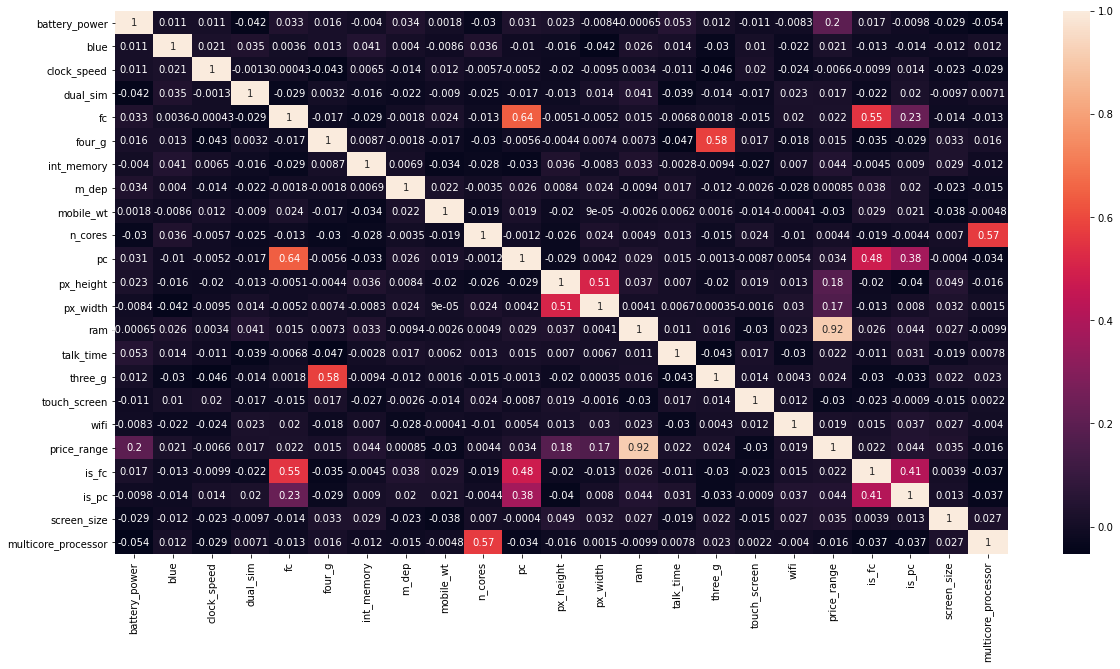

In [543]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [544]:
correlation = df.corr()
correlation['price_range'].sort_values(ascending = False)[1:]

# correlation just to help you see a bigger picture of what's actually affecting a price range \
# from this we can see that the size of a ram is highly correlated with price range 

ram                    0.917046
battery_power          0.200723
px_height              0.183910
px_width               0.165818
int_memory             0.044435
is_pc                  0.043910
screen_size            0.034804
pc                     0.033599
three_g                0.023611
is_fc                  0.022085
fc                     0.021998
talk_time              0.021859
blue                   0.020573
wifi                   0.018785
dual_sim               0.017444
four_g                 0.014772
n_cores                0.004399
m_dep                  0.000853
clock_speed           -0.006606
multicore_processor   -0.016455
mobile_wt             -0.030302
touch_screen          -0.030411
Name: price_range, dtype: float64

In [545]:
df.describe()

# the average size of a phone is around 5.5 inches

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,multicore_processor
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,781.500027,1251.515500,2124.213000,11.011000,0.761500,0.503000,0.507000,1.500000,0.763000,0.949500,5.57026,0.879000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,353.792639,432.199447,1084.732044,5.463955,0.426273,0.500116,0.500076,1.118314,0.425349,0.219029,1.96248,0.326209
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,240.000000,500.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.01000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,518.000000,874.750000,1207.500000,6.000000,1.000000,0.000000,0.000000,0.750000,1.000000,1.000000,3.88000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,762.500000,1247.000000,2146.500000,11.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000,5.64000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,1.000000,1.000000,1.000000,2.250000,1.000000,1.000000,7.10000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.30000,1.000000


In [546]:
df.describe(include = 'O')

,screen_quality
count,2000
unique,2
top,HD Screen
freq,1347


In [547]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


In [548]:
df.stb.freq(['blue'], cum_cols=False)

# half of the phone in the dataset doesnot have bluetooth while the other half have bluetooth


,blue,count,percent
0,0,1010,50.5
1,1,990,49.5


In [549]:
df.stb.freq(['dual_sim'], cum_cols=False)

# half of the phone here have a dual simcard slot the other half doesn't

,dual_sim,count,percent
0,1,1019,50.95
1,0,981,49.05


In [550]:
df.stb.freq(['fc'], cum_cols=False)

# majority of phone in this dataset have a front facing camera
# almost a quarter of the phone in this dataset doesn't have front facing camera 

,fc,count,percent
0,0,474,23.70
1,1,245,12.25
2,2,189,9.45
3,3,170,8.50
4,5,139,6.95
5,4,133,6.65
6,6,112,5.60
7,7,100,5.00
8,9,78,3.90
9,8,77,3.85


In [551]:
df.stb.freq(['speed'], cum_cols=False)

# 63.6% of phones in this data set has a processing speed more than 1 GHZ 

,speed,count,percent
0,upto 1GHz,728,36.40
1,upto 2.5GHz,345,17.25
2,upto 2GHz,330,16.50
3,upto 1.5GHz,312,15.60
4,upto 3.0GHz,285,14.25


In [552]:
df.stb.freq(['n_cores'], cum_cols=False)

# most of the phones in this dataset is a multicore processor (more than 1 core processing)
# only 12.1 percent is a single core

,n_cores,count,percent
0,4,274,13.70
1,7,259,12.95
2,8,256,12.80
3,2,247,12.35
4,5,246,12.30
5,3,246,12.30
6,1,242,12.10
7,6,230,11.50


In [553]:
df.stb.freq(['pc'], cum_cols=False)

# 95% phone in this dataset has a primary camera (back camera)
# only 5 % of phones in this dataset doens't have camera 

,pc,count,percent
0,10,122,6.10
1,7,119,5.95
2,9,112,5.60
3,20,110,5.50
4,14,104,5.20
5,1,104,5.20
6,0,101,5.05
7,17,99,4.95
8,2,99,4.95
9,6,95,4.75


In [554]:
df.stb.freq(['ram_size'], cum_cols=False)

# more than 3/4 phones in this dataset has ram over 1 GB
# while the rest has ram less than 1 GB

,ram_size,count,percent
0,2 to 3 GB,556,27.813907
1,3 to 4 GB,524,26.213107
2,1 to 2 GB,522,26.113057
3,512 MB to 1GB,255,12.756378
4,256 to 512 MB,142,7.103552


In [555]:
df.stb.freq(['talk_time'], cum_cols=False)

# talk time in this data set seems to be spread out evenly

,talk_time,count,percent
0,7,124,6.20
1,4,123,6.15
2,16,116,5.80
3,15,115,5.75
4,19,113,5.65
5,6,111,5.55
6,10,105,5.25
7,8,104,5.20
8,11,103,5.15
9,20,102,5.10


In [556]:
df.stb.freq(['four_g'], cum_cols=False)

# half of the dataset here have a 4G line while the rest doesn't 

,four_g,count,percent
0,1,1043,52.15
1,0,957,47.85


In [557]:
df.stb.freq(['three_g'], cum_cols=False)

# three quarter of the phones in this data set has a 3G line 
# while quarter of it doesn't even have 3G

,three_g,count,percent
0,1,1523,76.15
1,0,477,23.85


In [558]:
df.stb.freq(['touch_screen'], cum_cols=False)

# touch screen technology seems to spread out half and half for phone in this dataset

,touch_screen,count,percent
0,1,1006,50.3
1,0,994,49.7


In [559]:
df.stb.freq(['wifi'], cum_cols=False)

# same goes to wifi technology

,wifi,count,percent
0,1,1014,50.7
1,0,986,49.3


In [560]:
df.stb.freq(['price_range'], cum_cols=False)

# the phone in this dataset seems to be spread out a quarter for each price range

,price_range,count,percent
0,3,500,25.0
1,2,500,25.0
2,1,500,25.0
3,0,500,25.0


In [561]:
df.stb.freq(['screen_quality'], cum_cols=False)

# majority of the phone here have a HD quality screen

,screen_quality,count,percent
0,HD Screen,1347,67.35
1,Not HD,653,32.65


### Multivariate Analysis 


since price range is our target variable here we're going to focus on how the each of independent variable will affect the price range of an item, and then we will dive in deeper on how each independent variable effect each other and how combined independent variable will effect price


In [562]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


### Battery, Talktime, and RAM

In [563]:
pd.crosstab(df['price_range'], columns = ['Average Battery'], values = df['battery_power'], aggfunc='mean')

## we can see that the higher the price range it tend to have a higher battery except on the price range 1 to 2 it seems that from
# price range 1 to 2 there's no significance difference from the average  battery power 

col_0,Average Battery
price_range,
0,1116.902
1,1228.868
2,1228.320
3,1379.984


In [564]:
pd.crosstab(df['price_range'], columns = 'Average Talk Time', values = df['talk_time'], aggfunc='mean')

# itseems that talk time doesn't really affect much on the price range of a cellphone

col_0,Average Talk Time
price_range,
0,10.612
1,11.362
2,10.972
3,11.098


In [565]:
df.groupby('price_range')['talk_time','battery_power'].mean()

# while the battery power is somewhat positively correlated correlated with the price range 
# the higher the battery power doesn't always mean a longer talk time 

,talk_time,battery_power
price_range,,
0,10.612,1116.902
1,11.362,1228.868
2,10.972,1228.320
3,11.098,1379.984


In [566]:
## comparing those three item with ram since from the correlation ram has the highest correlation among all columns

df.groupby('price_range')['talk_time','battery_power','ram'].mean()

# so the higher price range has a significanly higher ram, and the higher the ram the higher the battery of a phone 

,talk_time,battery_power,ram
price_range,,,
0,10.612,1116.902,785.314
1,11.362,1228.868,1679.490
2,10.972,1228.320,2582.816
3,11.098,1379.984,3449.232


### Camera and Price Range

In [567]:
pd.crosstab(df['price_range'], df['front_camera'], normalize = 'columns')

# there's no a distinguish pattern from looking the the camera pixel except on the upto 20mp phone primary camera 

front_camera,upto 4MP,upto 8MP,upto 12MP,upto 16MP,upto 20MP,No Camera
price_range,,,,,,
0,0.257802,0.250000,0.237288,0.205607,0.222222,0.255274
1,0.244233,0.233645,0.245763,0.308411,0.277778,0.261603
2,0.223881,0.271028,0.305085,0.214953,0.166667,0.255274
3,0.274084,0.245327,0.211864,0.271028,0.333333,0.227848


In [568]:
pd.crosstab(df['price_range'], df['primary_camera'], normalize = 'columns')

# the majority of no camera phone are in the price range 0 which is kinda make sense less technoloy = cheaper price  

primary_camera,upto 4MP,upto 8MP,upto 12MP,upto 16MP,upto 20MP,No Camera
price_range,,,,,,
0,0.263427,0.229282,0.253102,0.257453,0.224599,0.326733
1,0.255754,0.245856,0.258065,0.211382,0.272727,0.267327
2,0.245524,0.254144,0.245658,0.298103,0.221925,0.198020
3,0.235294,0.270718,0.243176,0.233062,0.280749,0.207921


In [569]:
df.groupby('price_range')['fc','pc'].mean()

# while front camera seems doesn't have any implication to price_range 
# it seems that higher price range has a higher megapixel on the primary camera 

,fc,pc
price_range,,
0,4.084,9.574
1,4.340,9.924
2,4.498,10.018
3,4.316,10.150


### Pixel, Screen Size and Price range

In [570]:
df.groupby('price_range')['px_height', 'px_width','screen_size'].mean()


# the pixel width and and height is somehow correlated with the price range 
# the higher the price range the higher the chances px_width and px_height
# the higest pricest range has the biggest screen size while, in general it doesn't seem to effect much on the price range

,px_height,px_width,screen_size
price_range,,,
0,679.602703,1150.270,5.55896
1,786.934862,1251.908,5.49266
2,785.410995,1234.046,5.45398
3,874.051548,1369.838,5.77544


### Internal Memory and RAM, weight and Price Range



In [571]:
df.groupby('price_range')['int_memory', 'ram', 'mobile_wt'].mean()


,int_memory,ram,mobile_wt
price_range,,,
0,31.174,785.314,140.552
1,32.116,1679.490,140.510
2,30.920,2582.816,143.614
3,33.976,3449.232,136.320


### Touch Screen and Price Range

In [572]:
pd.crosstab(df['price_range'], df['touch_screen'], normalize = 'columns')

touch_screen,0,1
price_range,,
0,0.239437,0.260437
1,0.240443,0.259443
2,0.266600,0.233598
3,0.253521,0.246521


### Visualization 

In [573]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


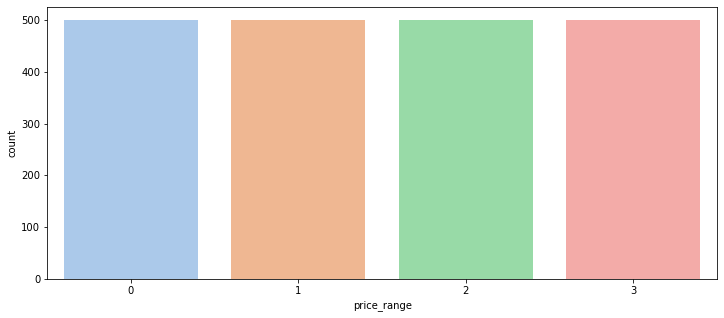

In [574]:
#price range 

plt.figure(figsize = (12, 5))
sns.countplot(df['price_range'], palette = 'pastel')
plt.show()

# there are 500 phones in each price_range

In [575]:
# in general that the disribution of  the ram size is multimodal distribution let's break it down
# per price range 

Text(0.5, 1.0, 'RAM distribution of price range 3')

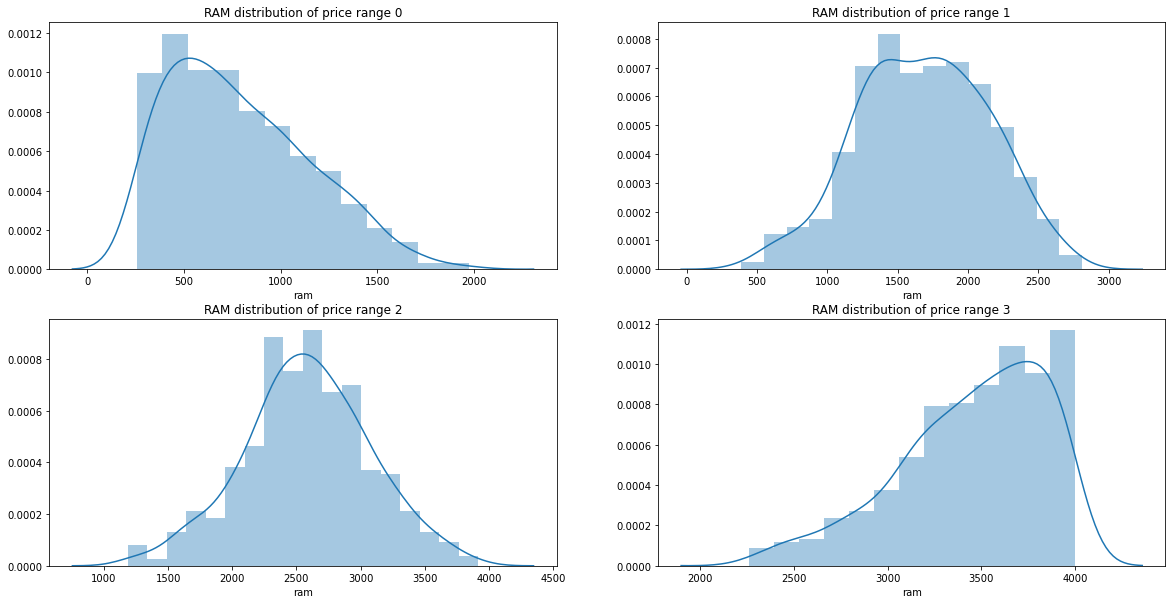

In [576]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'])
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'])
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'])
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'])
plt.title('RAM distribution of price range 3')

# we can see from the chart below that the distribution is looking very different if we compare it 
# per price range 

# for the the price range 0 majority of the phone are in range of 400 - 700 mb RAM, and the max is around 2000 mb
# for  price range 1 ranging from 500 - 3000 with the highest distribution on RAM around 1300 - 2000mb
# for the price range 2 the RAM distribution ranging  from 1000 - 4000 mb with the highest distribution
# around 2500mb
# for the highest price range the ram range from 2000mb to - 4000 mb with the highest distribution around 4000 mb

# this we can make conclusion that from our last analysis that the higher the price range the higher 
# the average ram size 

# and from this distribution plot we can see that the min value of ram increases with the increase 
# of the price range this conclude that the higher price range has higher min value of ram 

### Battery 

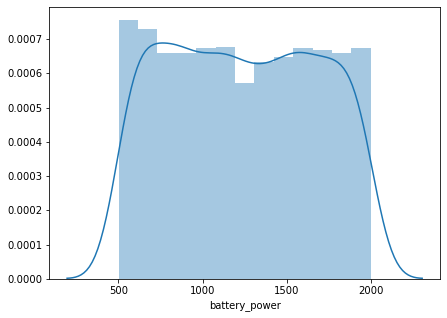

In [577]:
plt.figure(figsize = (7, 5))
sns.distplot(df['battery_power'])
plt.show()

Text(0.5, 1.0, 'battery distribution of price range 3')

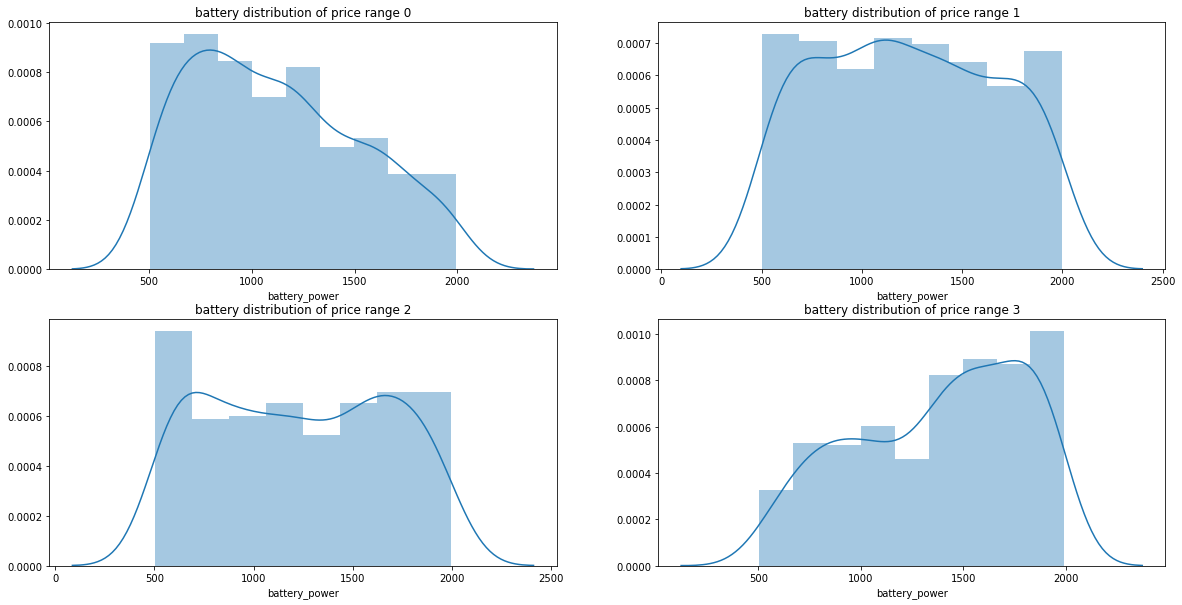

In [578]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['battery_power'])
plt.title('battery distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['battery_power'])
plt.title('battery distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['battery_power'])
plt.title('battery distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['battery_power'])
plt.title('battery distribution of price range 3')

# well the battery power distribution itself doesn't really tell a lot about how it correlated with price
# we can see that the pricerange 0 has more lower power battery product compared to other price range 
# since the distribution  is somehow right skewed 

### Pixel Height and Width

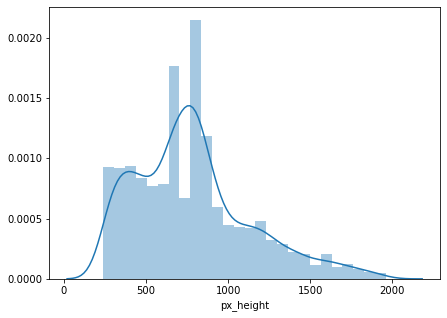

In [579]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_height'])
plt.show()

Text(0.5, 1.0, 'Pixel Height distribution of price range 3')

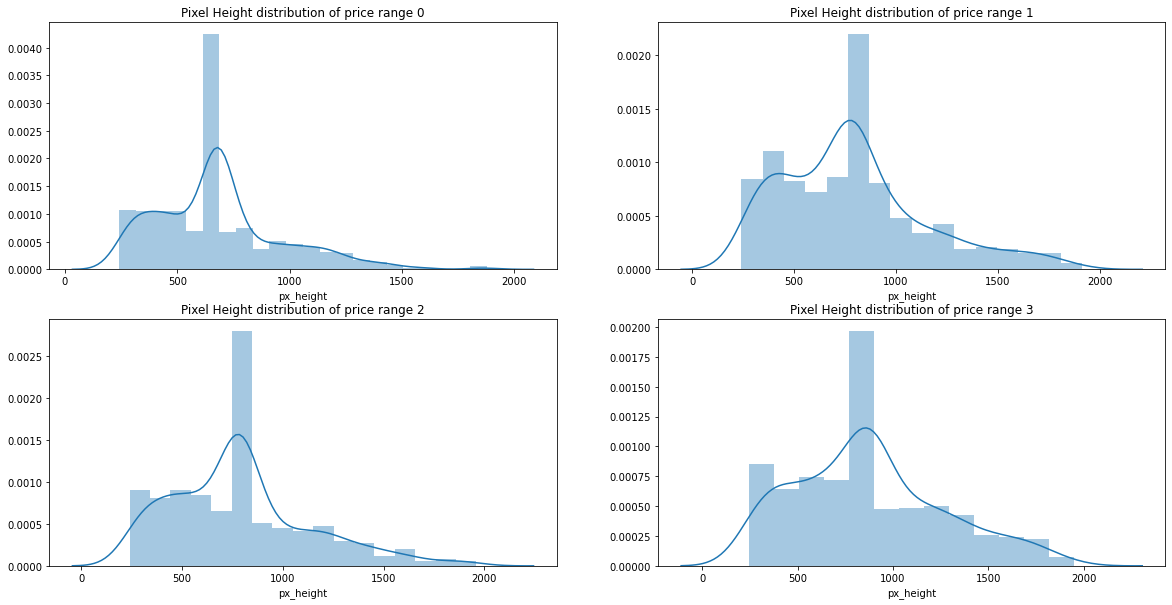

In [580]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_height'])
plt.title('Pixel Height distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_height'])
plt.title('Pixel Height distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_height'])
plt.title('Pixel Height distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_height'])
plt.title('Pixel Height distribution of price range 3')

# the pixel weight distribution is right skewed even after we subset it per price range 


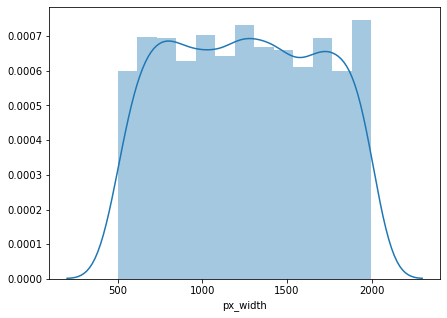

In [581]:
plt.figure(figsize = (7, 5))
sns.distplot(df['px_width'])
plt.show()

# compared to the pixel height the pixel width have a multimodal distribution
# and we will see how's the distribution per price range 

Text(0.5, 1.0, 'Pixel Width distribution of price range 3')

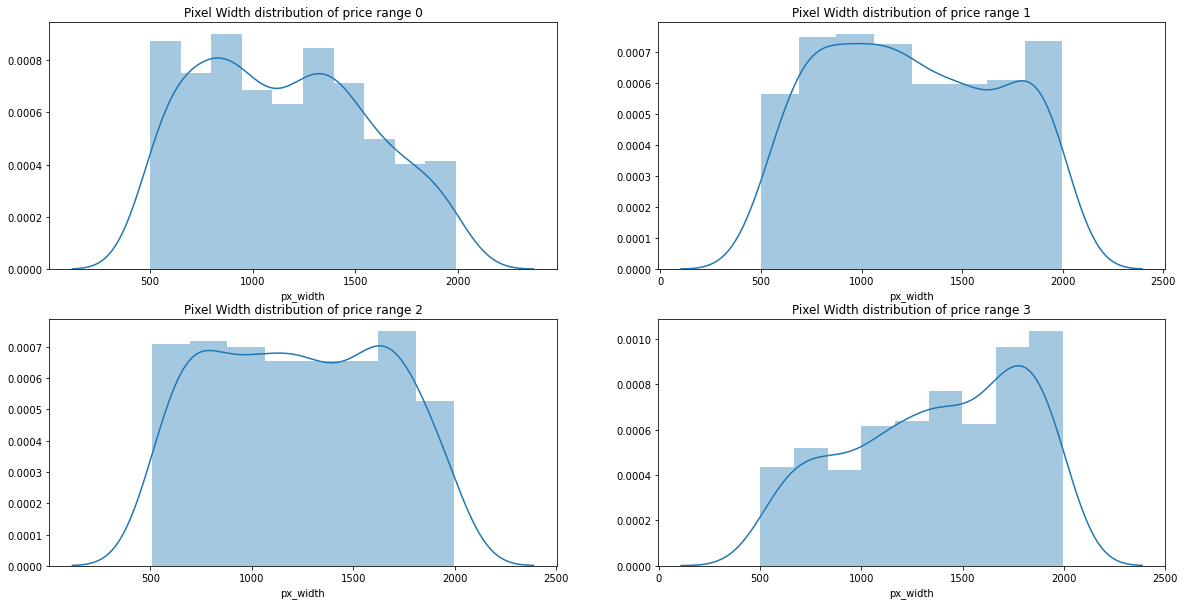

In [614]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['px_width'])
plt.title('Pixel Width distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['px_width'])
plt.title('Pixel Width distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['px_width'])
plt.title('Pixel Width distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['px_width'])
plt.title('Pixel Width distribution of price range 3')

# there's something interesting with pixel width
# we see that the price range of 0 has more product on the lower pixel width 
# while the highest price range has more products toward the higher end of pixel width 
# on the price range of 2 and 3 seems like the products is almost evenly distributed by px width

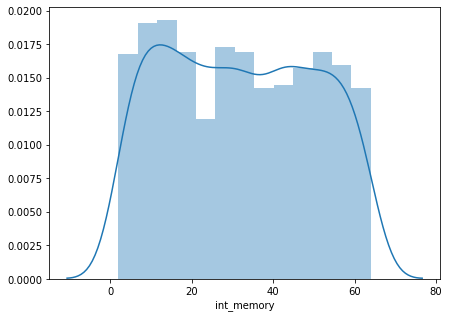

In [583]:
plt.figure(figsize = (7, 5))
sns.distplot(df['int_memory'])
plt.show()

Text(0.5, 1.0, 'Internal memory distribution of price range 3')

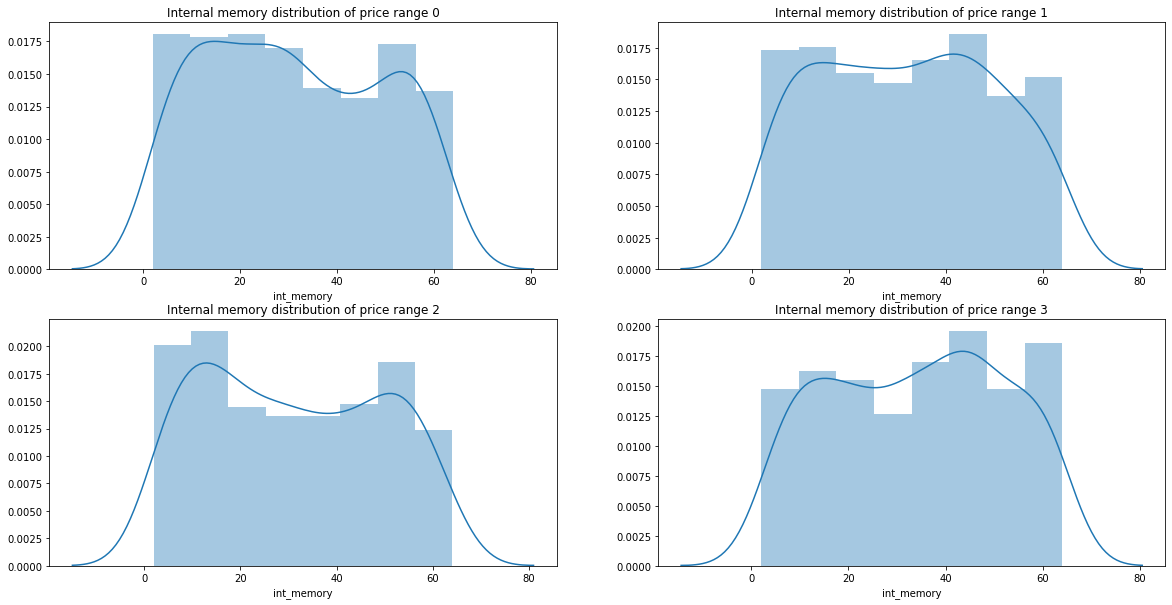

In [584]:
plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['int_memory'])
plt.title('Internal memory distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['int_memory'])
plt.title('Internal memory distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['int_memory'])
plt.title('Internal memory distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['int_memory'])
plt.title('Internal memory distribution of price range 3')

## we can see that internal memory sizes doesn't have many difference when it comes to distribution
# per price range 

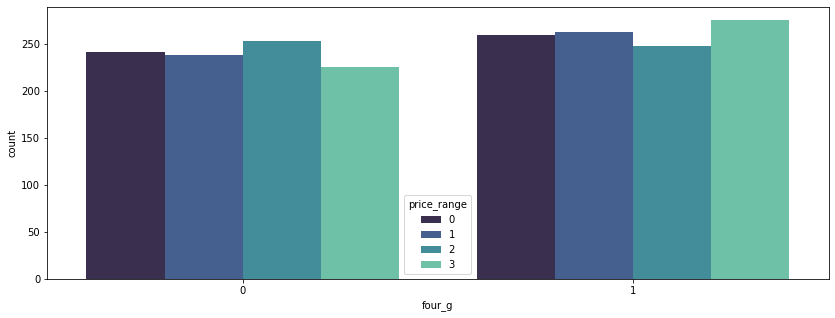

In [585]:
plt.figure(figsize = (14, 5))
sns.countplot(df['four_g'], palette = 'mako', hue = df['price_range'])

# there are slightly more phone with 4g line compared to non 4g line 
# phone with price range 3 has the most 4gline  among all group

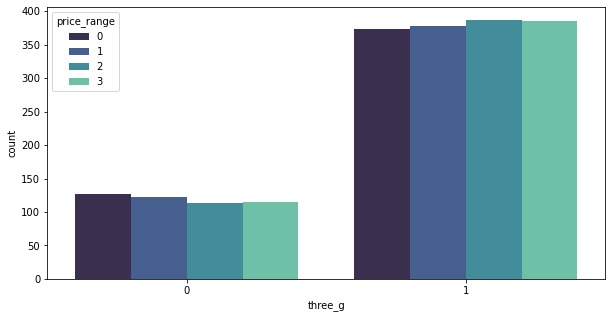

In [586]:
plt.figure(figsize = (10, 5))
sns.countplot(df['three_g'], palette = 'mako', hue = df['price_range'])



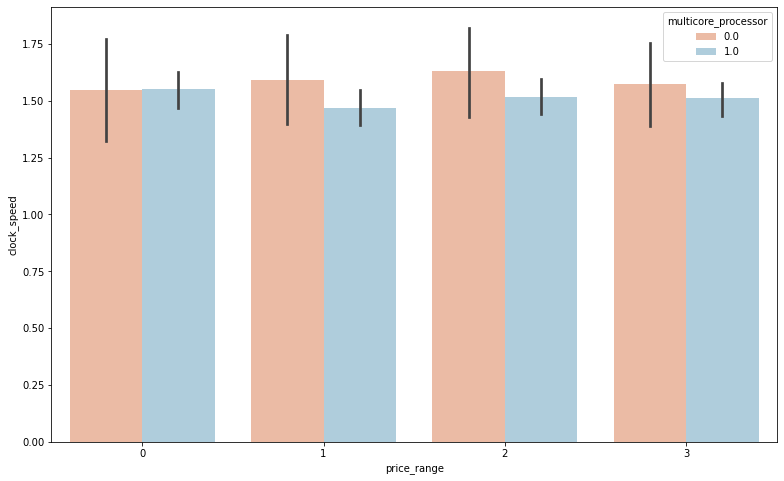

In [587]:
# Processor and price Range

plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['clock_speed'], hue= df['multicore_processor'], palette = 'RdBu')

# singlecore processor has a faster avg clock speed compared to multicore processor in all price range 

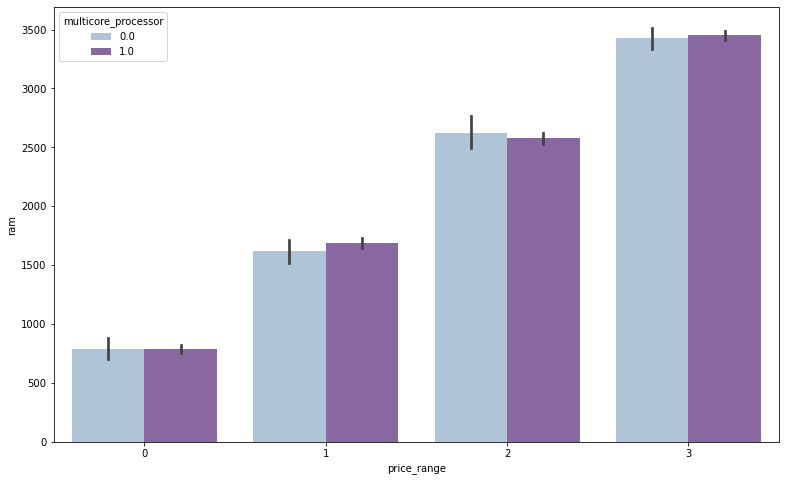

In [588]:
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['multicore_processor'], palette = 'BuPu')

# as from our analysis before that ramsize is highly correlated with the price range 
# the more expensive the price range the higher the ram a phone have 

### Multivariate Visualization


since from our analysis before we found out that RAM has the highest correlation for price range we are going to visualize independet variable with ram and price range 

In [589]:
df.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,is_fc,is_pc,screen_size,screen_quality,ram_size,speed,multicore_processor,primary_camera,front_camera
0,842,0,2.2,0,1,0,7,0.6,188,2,2,786.934862,756,2549,19,0,0,1,1,1.0,1.0,4.49,HD Screen,2 to 3 GB,upto 2.5GHz,1.0,upto 4MP,upto 4MP


#### Battery Power Ram and Price Range

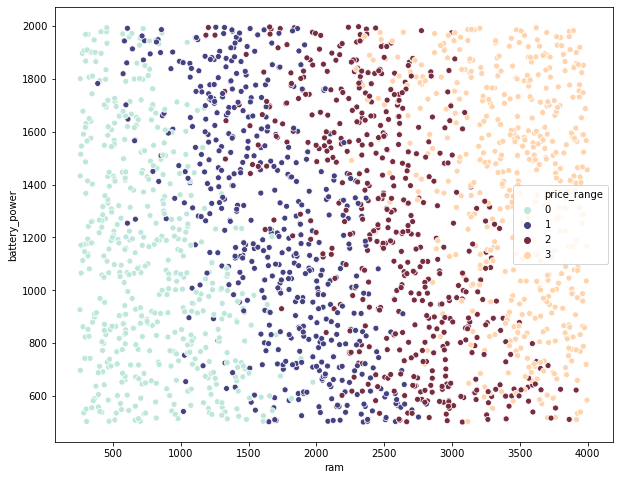

In [590]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['battery_power'], hue = df['price_range'], palette = 'icefire')

# we know froum our past analysis that ram affect the price range 
# however from the scatter plot below we can see that battery power vary for each ram sizes

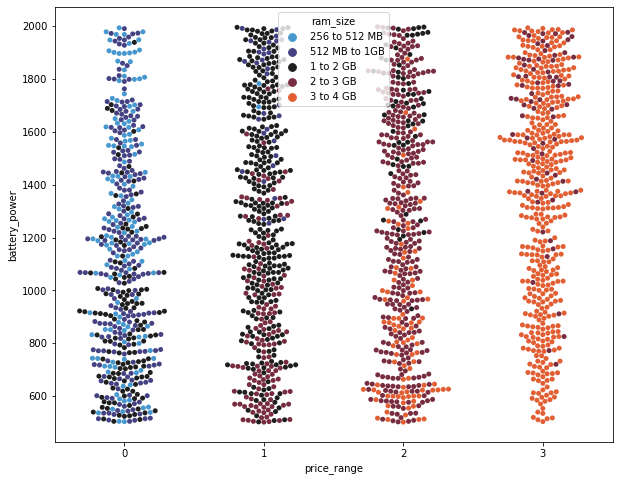

In [591]:
plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'icefire')

# phone with price range 3 more likely to have a higher battery power compared to phone in price 
# range 1 and 2 

### Ram, Price and Processor

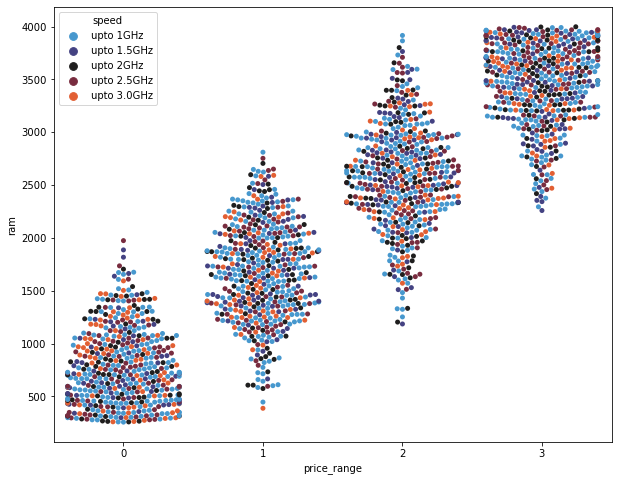

In [592]:
#clock speed and ram

plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'icefire')

# from this plot below we see many overlapping that even with small ram it's possible to have
# up to 3 GHz clock speed

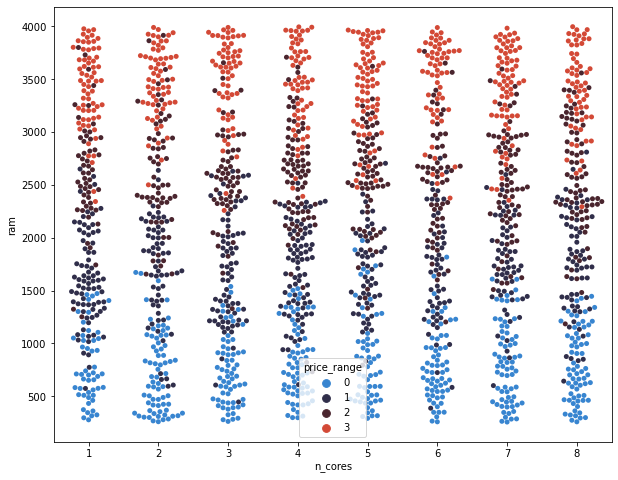

In [593]:
# number of cores ram and price range 

plt.figure(figsize = (10, 8))
sns.swarmplot(df['n_cores'], df['ram'], hue = df['price_range'], palette = 'icefire')

# this graph below shows that number of cores could vary in different size of ram
# you could have many cores and low ram
# or high ram with low number of cores 

# the only things that seems to affect the price is ram here

# from each number of cores the graphic looks the same means you could have phone in price range 0 
# with 8 number of cores or phone with price range of 3 with 1 core

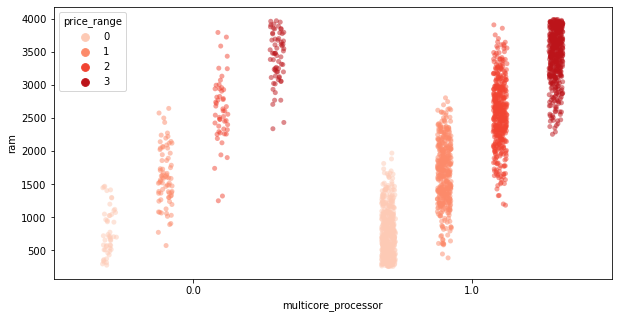

In [594]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['multicore_processor'], df['ram'], hue = df['price_range'], dodge=True, alpha = 0.5, \
             palette = 'Reds')

# we can see here that multicore processor is more popular in all price range compared to singlecore
# however is not imposibble to have a single core processor in all price range with different size of ram

### Bluetooth Ram and price range 

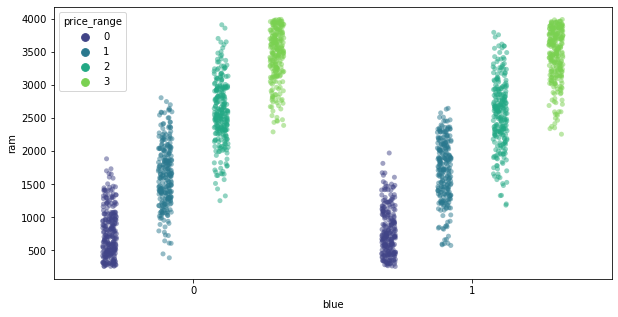

In [595]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['blue'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'viridis')

# bluetooth seems to have no effect on ram and price range 
# phone with no bluetooth could have the same number of ram with phone that has bluetooth

### Dual sim, price and Ram

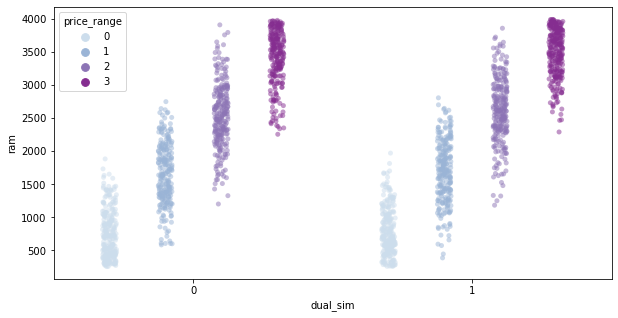

In [596]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['dual_sim'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')

# same goes to dual sim is seem that having dual sim doesn't affect the ram size or price range 


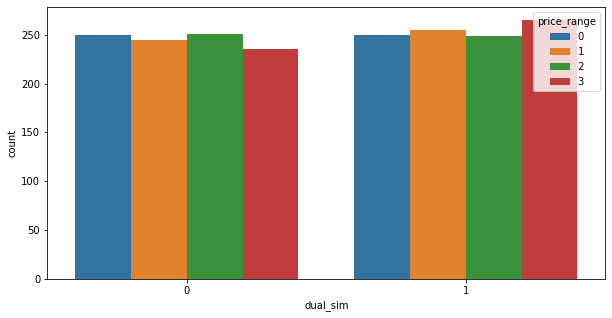

In [597]:
plt.figure(figsize = (10, 5))

sns.countplot(df['dual_sim'], hue = df['price_range'])

# there is no major difference in term of number of phones that has dual sim in every price range

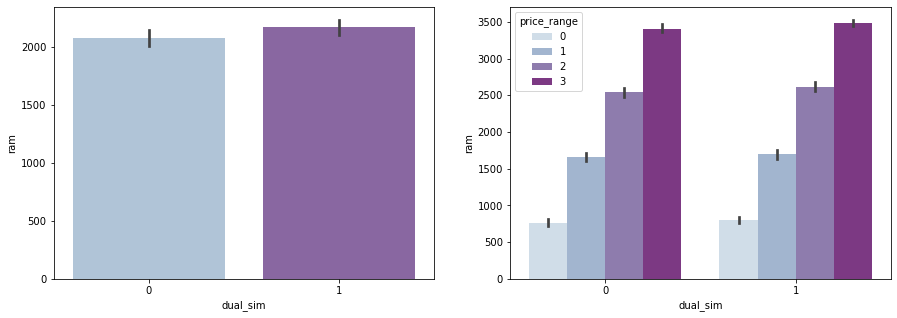

In [598]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.barplot(df['dual_sim'], y = df['ram'], palette = 'BuPu')

plt.subplot(1,2,2)
sns.barplot(df['dual_sim'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')


#phone with dual sim have a slightly higher ram compared to non dual sim

### Memory and Ram, Price

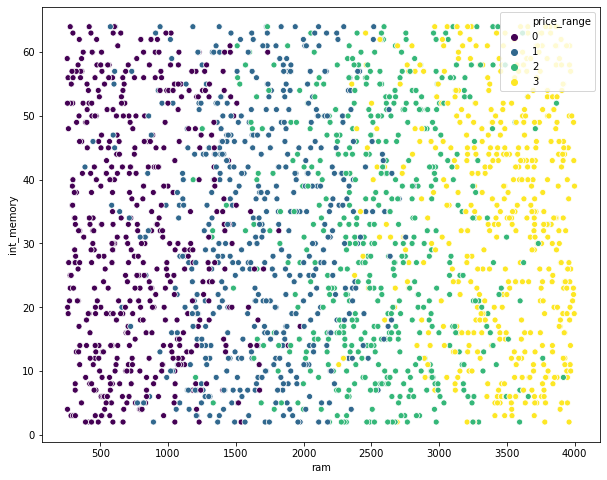

In [599]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df['ram'], df['int_memory'], hue = df['price_range'], palette = 'viridis')

# number of memory and ram itseems doesn't have any correlation between each other 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text major ticklabel objects>)

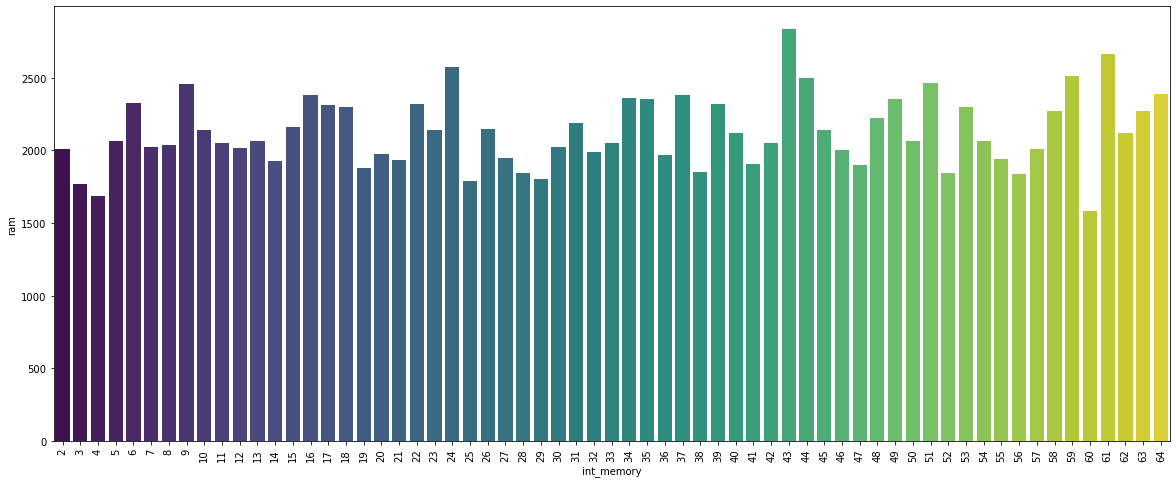

In [600]:
plt.figure(figsize = (20, 8))


sns.barplot(df['int_memory'], y = df['ram'], palette = 'viridis', ci = False)
plt.xticks(rotation = 90)

# the higher the memory size doesn't always means a higher ram
# the highest average ram is from phone that has an internal memory of 43

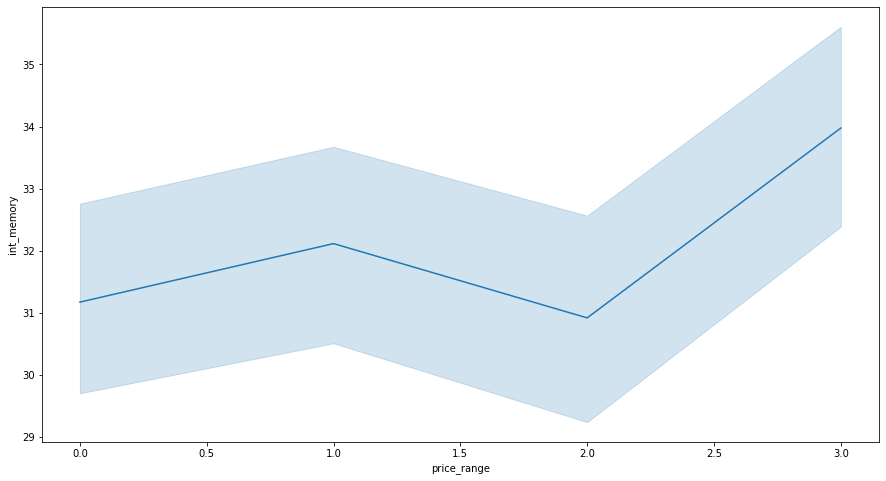

In [601]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['int_memory'], palette = 'mako')

# the average memory for all price range is kind of different 
# but looking at the trend down below 

# from price range 0 to 1 there's a slight increase in memory sizes 
# from price range 1 to 2 there's a descrease in memory sizes 
# while for the most expensive price range we see a major sharp incline in memory sizes 

### Cameras

**Primary Camera**

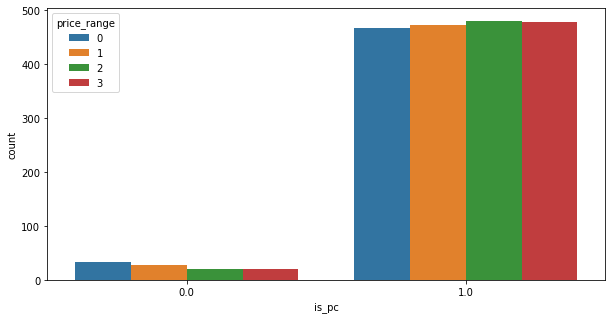

In [602]:
plt.figure(figsize = (10, 5))

sns.countplot(df['is_pc'], hue = df['price_range'])

# there's very low number of phone without back camera (primary camera)
# phone with 0 price range has the highest number of no primary camera

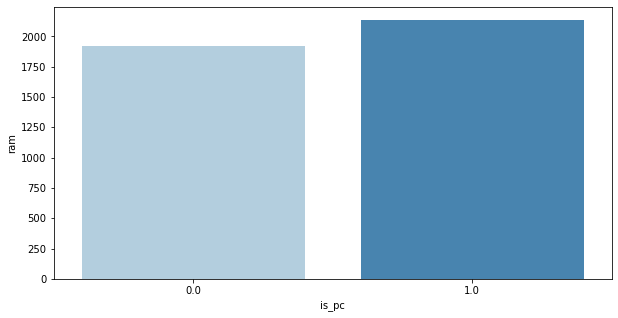

In [603]:
plt.figure(figsize = (10, 5))

sns.barplot(df['is_pc'], df['ram'], ci = False, palette = 'Blues')

# phone without primary camera has lower average ram compared to phone that has primary camera 
# this might be because phone with no camera majority are in price range 0 which is has a lower avg ram
# compared to the rest of the group 

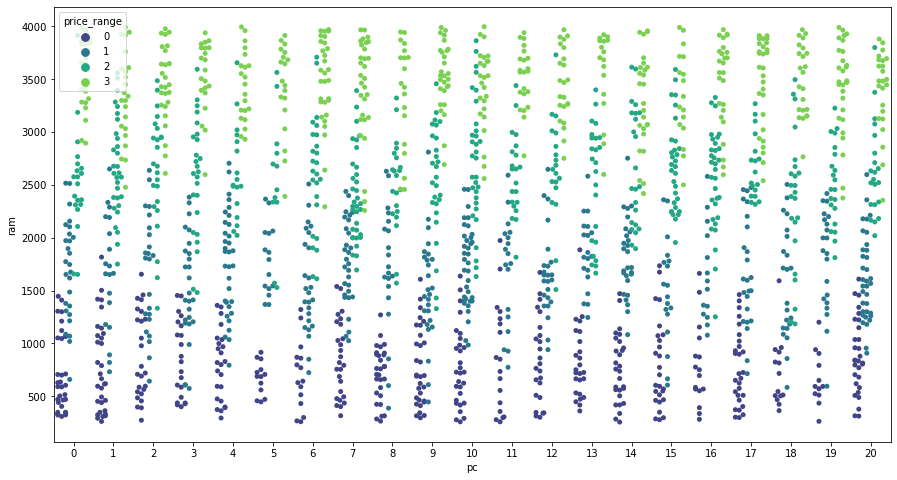

In [604]:
plt.figure(figsize = (15, 8))
sns.swarmplot(df['pc'], df['ram'], hue = df['price_range'], palette = 'viridis', dodge = True)


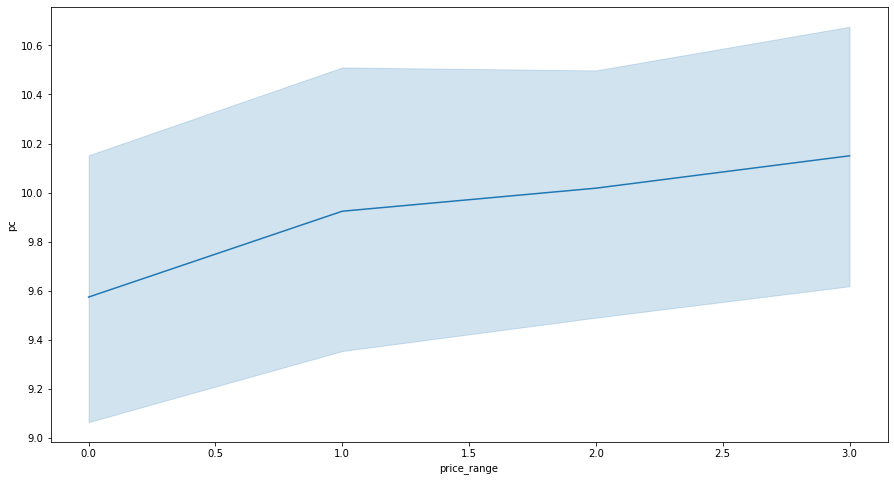

In [605]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['pc'], palette = 'mako')

# we can see that there's a slightly increase in average primary camera megapixel when the price range 
# increase 

### Front Camera

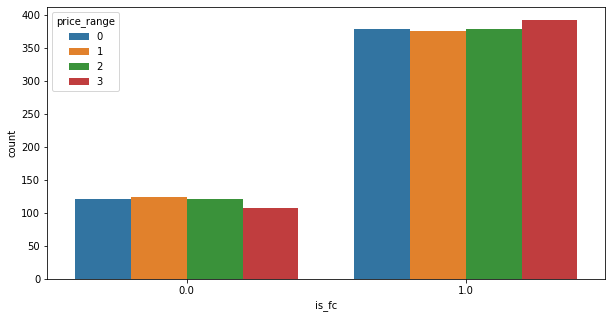

In [606]:
plt.figure(figsize = (10, 5))

sns.countplot(df['is_fc'], hue = df['price_range'])


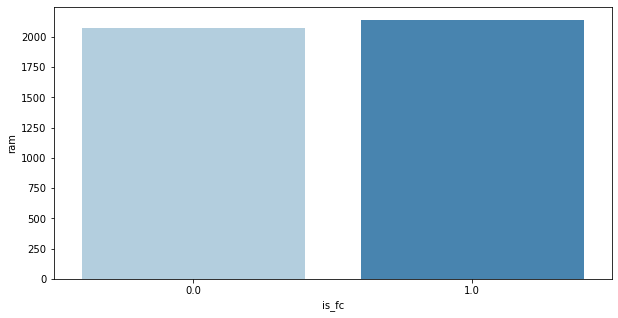

In [607]:
plt.figure(figsize = (10, 5))

sns.barplot(df['is_fc'], df['ram'], ci = False, palette = 'Blues')

# same analysis with primary camera

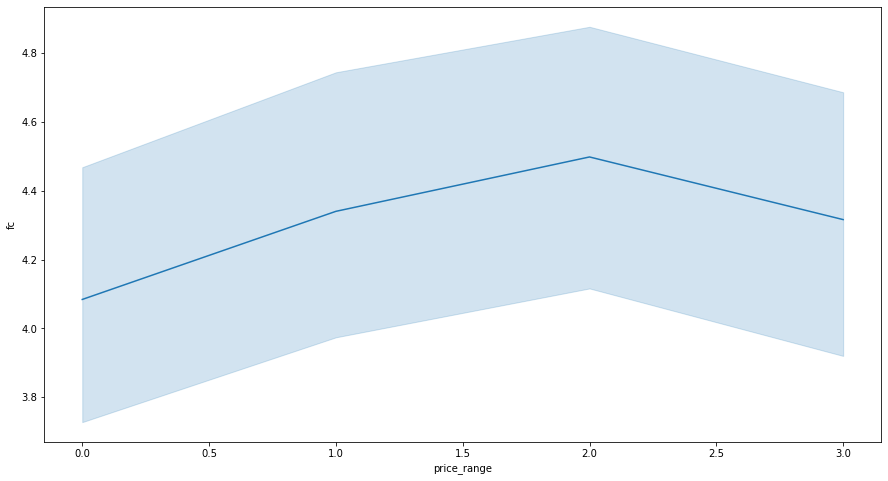

In [608]:
plt.figure(figsize = (15, 8))
sns.lineplot(df['price_range'], df['fc'], palette = 'mako')

# by looking at this graph the price range increase as the front camera increase 
# however the the average front camera megapixel drop when the price range goes from 2 to 3

### Screen

#### Pixel width and pixel height

Text(0.5, 1.0, 'Correlation between pixel width and height')

<Figure size 720x360 with 0 Axes>

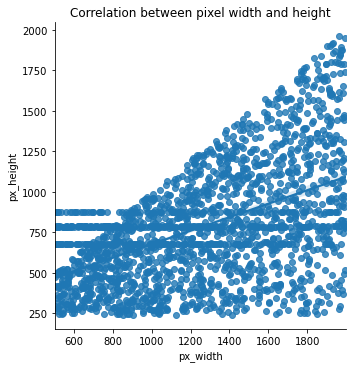

In [609]:
plt.figure(figsize = (10, 5))
sns.lmplot(x ='px_width', y ='px_height', data = df)
plt.title('Correlation between pixel width and height')



# we can see that pixel wifth and pixel height is positively correlated with each other 
# means in if one pixel value get higher the other pixel value most likely to follow

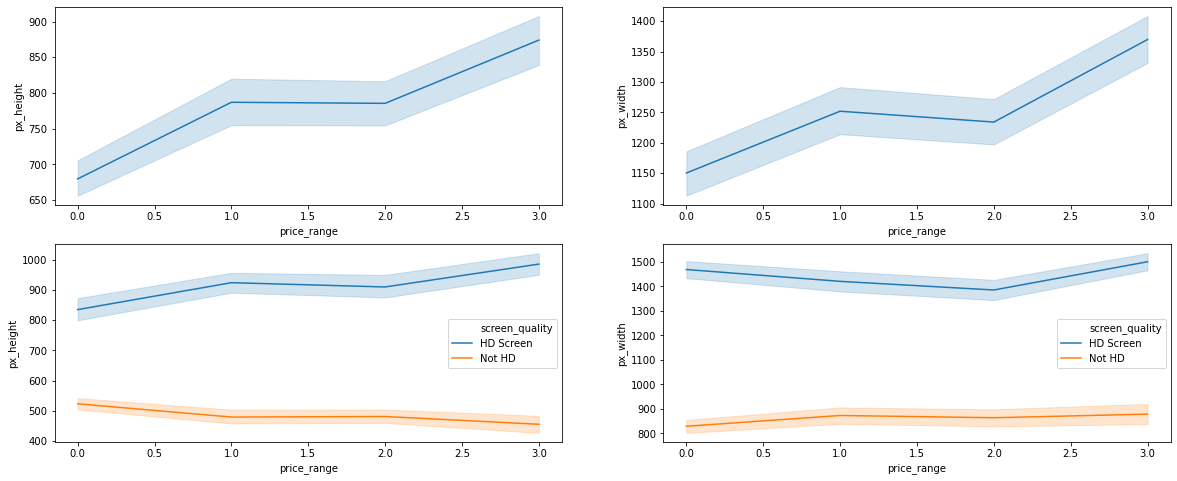

In [610]:
plt.figure(figsize = (20, 8))

plt.subplot(2,2,1)
sns.lineplot(x ='price_range', y ='px_height', data = df)
plt.subplot(2,2,2)
sns.lineplot(x ='price_range', y ='px_width', data = df)
plt.subplot(2,2,3)
sns.lineplot(x ='price_range', y ='px_height', hue= 'screen_quality', data = df)
plt.subplot(2,2,4)
sns.lineplot(x ='price_range', y ='px_width', data = df, hue = 'screen_quality')

# we can see that both pixel width and height value generally goes up as the price range goes up 
# so as the phone become more expensive it has a better screen quality

#however we see that price for non HD screen the pixel size generally stays the same even though it
# increases in price range

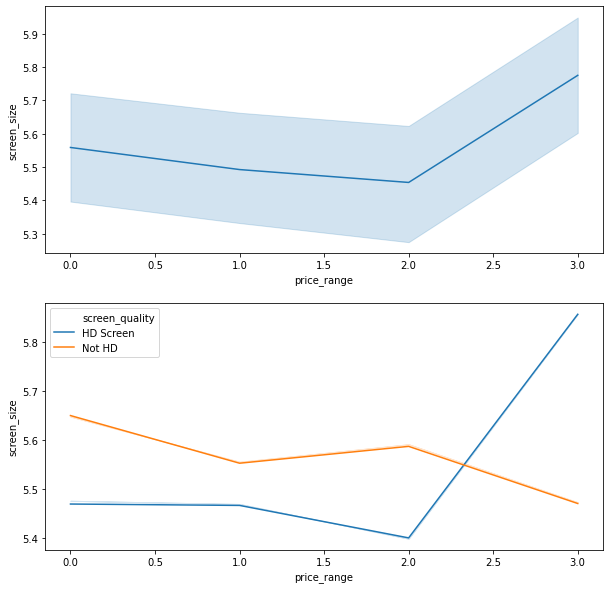

In [611]:
### screen size 

plt.figure(figsize = (10, 10))
plt.subplot(2,1,1)
sns.lineplot(x ='price_range', y ='screen_size', data = df)
plt.subplot(2,1,2)
sns.lineplot(x ='price_range', y ='screen_size', hue = 'screen_quality', data = df, ci = False)

# we can see that from price range 0 to 2 the trend for the screen size generally goes down
# however the screen size trend for the price range 3 tend to go up
# the price range 3 on average has a bigger screen size compared to the rest of the group

# if we split it into 2 different categories non hd screen and hd screen we can clearly view that
# hd screen size goes higher in average when  the price range is 3
# while for non hd screen the size is kind of fluctuatively goes up and down

In [657]:
df.to_csv('phone_cleaned2.csv')

## Conclusion,  Recommendation, and Future Improvement


### Conclusion

- **What are the specification that affecting phone prices**
 from our analysis using the correlation method and seaborn heatmap, the major specification that affecting the price range are 
       
   1. **RAM Size** the more expensive phone **(higher price range)** has a higher RAM size. From our analysis we found out that the higher the price range the higher the minimum ram size for phones 
        
   2. **Battery Power** for the battery power the min battery power of all phone price range are around 500 mAh, and the maximum battery power of all price range is around 2000 mAh. However the the average battery power keep increasing in general as the price range goes up.and from our analysis the distribution of battery power for phone that's in the higher price range are slight *left skewed* compared to the phone with the lower price range (price range 1 & 0) are slightly *right skewed*
   
   3. **PX height & PX width** pixel height and pixel width are the determinant factor when it comes to screen quality and in this case the height and the width play a role when it comes to determining a price of a phone range, for the pixel width it shows that phone that's in a higher price range has a higher pixel width. however for the pixel width the distribution kind of looks similar for phone in all price range 
   

- **Screen Size and Phone Price Range** 

in general the screen size for phone doesn't really much effect on the price range, the average screen size for phone in **price range 0 - 2** are somewhere around **5.55 inches** to **5.6 inches**. however there's a somewhat of a jump in screensize when it comes to price range 3, the average screensize for price range 3 is somewhere around **5.7 inches**


**HD Screen** For phone that has HD quality screen the screen the trend of screen size kind of similar with the general trend the difference here is that **HD Screen** has a slightly lower screen size in average for price range 0 - 2 compared to the general population, and for the higher price range *(price range 3 )* **HD Screen has a slightly higher average screen size (5.8 Inches)** compared to the entire population.

**Not HD Screen** For non HD phone the screen size of a phone keep getting smaller as the phone price range goes up, the highest average screen size for non HD screen is in price range 0, at around **(5.65)** and the lowest average of screen size is in price range 3 **(5.5)** inches 


- **Camera Megapixel and Price Range**



by looking at the table above we can see that for the **primary camera (back camera)** the average megapixel is somehow positively correlated with the price range , as the average megapixel get higher as  the price range get more expensive.

However for the front camera the size of the megapixel doesn't really have any positive or negative correlation to the price range


## Recommendation 

**RAM Size**

The main factor that's affecting phone price range is **RAM SIZE** so if a phone so if a smartphone company would like to create a phone in a specific price range, the **RAM Size** is one of the specification that needs to be watched carefully, since it's a feature that affecting the price range of a phone from this dataset


Second is **battery power** the more expensive the smartphone the higher the battery sizes it should have, since higher RAM needs more power from the battery, a smartphone company should adjust their battery battery accordingly, and what's all the RAM power if a phone could only last for a couple of hour

**Screen Quality and Screen Size**


Since Pixel width and Pixel Height affecting the HD or Non HD screen quality, this specification needs to be watched before a phone company launch a new product, The Screen size's need to be considered when lauching a new phone, **NON HD** screen should not have **a big screen for phone in price range 3** because of the trend from our analysis, and the image quality will also get pixelated from having too big  of a screen and too low of pixel width and size 


**For HD Screen** as the phone company want to launch a phone in a higher price range, the pixel width and the pixel height of a phone should be in a higher range **(Price Range 3)** as well, and for the screen sizes phone with **HD screen** and high price range, the screen size's should be bigger than the screen size of lower price range


**Camera Megapixel**

From our Analysis it shows that phone with a higher price range has a **higher camera pixel size**, and for the front camera the pixel size of a front phone camera it seems doesn't have a positive or negative correlation with the price range.

so for the phone company **Primary Camera** or back camera megapixel size should be more considerated compared to the front camera

